In [2]:
import numpy as np
from atmosparams import get_params
from ionprod import ionprod, maxw
import matplotlib.pyplot as plt

In [3]:
dt = np.datetime64("2016-03-09T19:00")
glat = 11.57
glon = 37.36
alts_km = np.arange(50, 200, 0.5)
rho, m, H = get_params(dt, alts_km, glat, glon)

In [4]:
nE = 300 # number of energy grids
E = np.logspace(-0.25, 2, nE) # E grid in keV
Q0 = 15*6.242e6 # energy flux in keV/cm^2 s. converting 15 mW/m^2 to keV/cm^2 s
E0 = 5. # in keV
Ec, dE, I = maxw(Q0, E0, E) # I is maxwellian energy spectra with charcterstic energy E0 

In [6]:

model = ionprod(rho, H, Ec, dE, I) # ion production model
q = model.getq() # get ion production rate in 1/cm^3 s

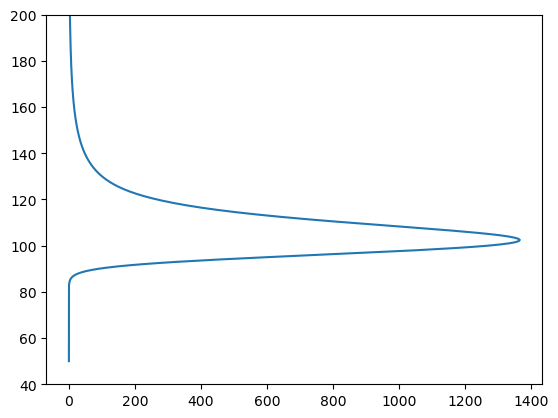

In [7]:
plt.plot(q, alts_km)
plt.ylim(40, 200)
plt.show()